In [86]:
import numpy as np
import glob, os
import matplotlib.pyplot as plt

from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure, FilledBands
from blg_strain.utils.utils import print_time

In [66]:
path = r'E:\sBLG_data\2020-08-07\StrainedLattice_eps0.010_theta0.000\*.h5'

In [167]:
sl = StrainedLattice.load(r'E:\sBLG_data\2020-08-07\StrainedLattice_eps0.010_theta0.000.h5')
bs_paths[0]

'E:\\sBLG_data\\2020-08-07\\StrainedLattice_eps0.010_theta0.000\\BandStructure_Nkx1000_Nky1000_Delta-50.000.h5'

In [79]:
# First pass - get Delta and EF values
bs_paths = glob.glob(path)
bs_paths.sort(key=os.path.getmtime)

Deltas = np.empty(len(bs_paths))
for i, bs_path in enumerate(bs_paths):
    start = bs_path.find('_Delta') + 6  # start of Delta value
    end = bs_path.find('.h5')  # end of Delta value
    Deltas[i] = float(bs_path[start:end])
    
    fb_paths = glob.glob(bs_path[:-3] + '\*.h5')
    fb_paths.sort(key=os.path.getmtime)

EFs = np.empty(len(fb_paths))    
for j, fb_path in enumerate(fb_paths):
    start = fb_path.find('_EF') + 3  # start of EF value
    end = fb_path.find('_T') # end of EF value
    EFs[j] = float(fb_path[start:end])

In [83]:
# Second pass - get ME coef alpha
bs_paths = glob.glob(path)
bs_paths.sort(key=os.path.getmtime)

alphas = np.empty((len(Deltas), len(EFs), 2))

for i, bs_path in enumerate(bs_paths):
    fb_paths = glob.glob(bs_path[:-3] + '\*.h5')
    fb_paths.sort(key=os.path.getmtime)   
    for j, fb_path in enumerate(fb_paths):
        fb = FilledBands.load(fb_path)
        alphas[i,j] = fb.alpha

In [91]:
alphasx, alphasy = alphas[:,:,0], alphas[:,:,1]

(-50, 50)

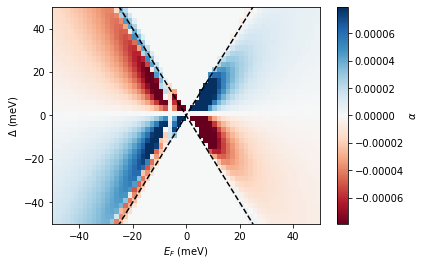

In [165]:

factor = .1
vmax = abs(alphasx).max() * factor
vmin = -vmax

fig, ax = plt.subplots()
im = ax.pcolormesh(EFs, Deltas, alphasx, cmap='RdBu', vmin=vmin, vmax=vmax)

ax.set_xlabel('$E_F$ (meV)')
ax.set_ylabel('$\Delta$ (meV)')
cb = plt.colorbar(im, label=r'$\alpha$')

ax.plot(EFs, 2*EFs, 'k--')
ax.plot(EFs, -2*EFs, 'k--')
ax.set_ylim(-50,50)

In [198]:
alphasx[29,:]

array([-6.80744800e-06, -7.41179497e-06, -8.10314216e-06, -8.86542989e-06,
       -9.70428481e-06, -1.07239754e-05, -1.18694367e-05, -1.31633388e-05,
       -1.46228887e-05, -1.64738503e-05, -1.85961951e-05, -2.10473064e-05,
       -2.38762723e-05, -2.73150267e-05, -3.14455653e-05, -3.65320987e-05,
       -4.26229860e-05, -4.98097306e-05, -5.80277298e-05, -6.76239404e-05,
       -7.36892181e-05, -5.34286321e-05,  4.28447361e-05,  1.85786384e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.41555775e-05,  3.58503969e-05,  3.71001825e-05,
        3.35180663e-05,  2.95156002e-05,  2.57491916e-05,  2.26030242e-05,
        1.93872993e-05,  1.66948200e-05,  1.43308414e-05,  1.22280546e-05,
        1.07758872e-05,  9.51676421e-06,  8.54311461e-06,  7.56529136e-06,
        6.69603185e-06,  

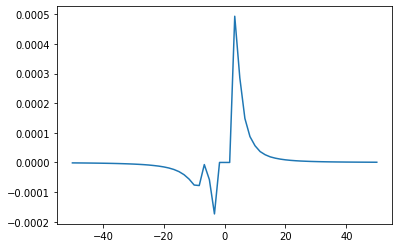

In [115]:
fig, ax = plt.subplots()
ax.plot(EFs, alphasx[22,:])

In [ ]:
from scipy.interpolate import SmoothBivariateSpline

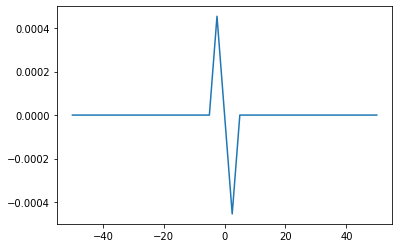

In [191]:
fig, ax = plt.subplots()
ax.plot(Deltas, alphasx[:,29])